In [10]:
import pandas as pd
import numpy as np
import anoexpress as express
import malariagen_data

### Load metadata

In [11]:
sample_sets = [
    # Ag1000G phase 3 sample sets in Ag3.0
    "AG1000G-GH", 
    'AG1000G-ML-A',
     'AG1000G-BF-A',
     'AG1000G-BF-B',
     'AG1000G-GN-A',
     'AG1000G-GN-B',
    'AG1000G-TZ',
    #tz gaard
    '1246-VO-TZ-KABULA-VMF00185',
    # GAARDIAN sample set in Ag3.4
    '1244-VO-GH-YAWSON-VMF00149',
    # GAARD Ghana sample set in Ag3.2
     "1244-VO-GH-YAWSON-VMF00051",
     '1245-VO-CI-CONSTANT-VMF00054',
     '1253-VO-TG-DJOGBENOU-VMF00052',
     '1237-VO-BJ-DJOGBENOU-VMF00050'
]

### Map the samples

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
font_path = '/home/sanj/.local/share/fonts/Diverda Sans W01 Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

In [14]:
ag3 = malariagen_data.Ag3(pre=True)
df_samples = ag3.sample_metadata(sample_sets)

In [15]:
df_samples.shape

(2898, 30)

In [16]:
df_samples.year.unique()

array([2017, 2018, 2012, 2014, 2015, 2013])

In [17]:
df_samples.country.unique().shape

(8,)

In [18]:
# Sample positions
freqMap = gpd.GeoDataFrame(
    df_samples, geometry=gpd.points_from_xy(df_samples.longitude, df_samples.latitude, crs="EPSG:4326"))

In [19]:
countries = df_samples.country.unique()

In [20]:
jitter_dict = {"Côte d'Ivoire": -0.8, "Benin":0.5, "Tanzania":0, "Ghana":-0.3, "Benin":0, "Guinea":0, "Burkina Faso":-0.3, "Togo":0, "Mali":0}

/tmp/ipykernel_15877/3744065451.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


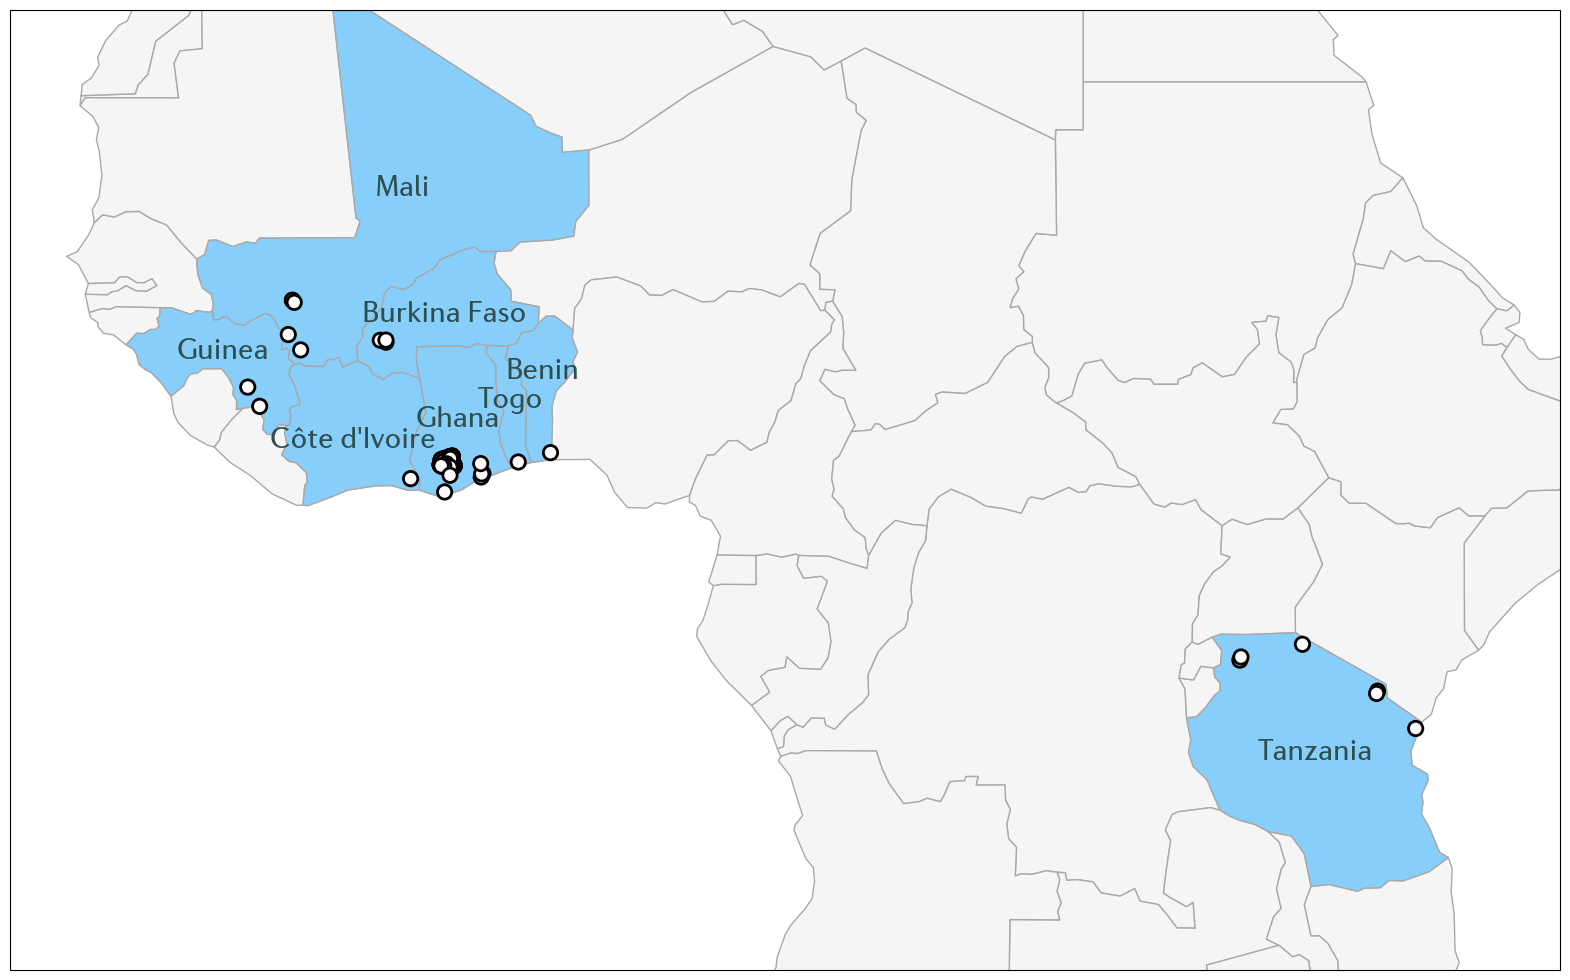

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df = pd.DataFrame({'name':countries, 'value':'lightskyblue'})

map_df = gpd.GeoDataFrame(world.query("continent == 'Africa'"))
map_df = map_df.to_crs('EPSG:4326')
map_df_samples = map_df.merge(df.replace("Cote d'Ivoire", "Côte d'Ivoire"))

subplot_kw = dict(projection=ccrs.PlateCarree())
# figsize here is the entire figure size in inches, reduced later by bbox_inches
# This dpi setting affects the display size of the figure in the notebook
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
#world[world.continent == 'Africa'].plot(ax=ax, color='grey', edgecolor='grey')
map_df.plot(ax=ax, color="whitesmoke", legend=True,  legend_kwds={'shrink': 0.45}, alpha=1, linewidth=1, edgecolor='darkgrey')
map_df_samples.plot(ax=ax, color=map_df_samples.value, legend=True,  legend_kwds={'shrink': 0.45}, alpha=1, linewidth=1, edgecolor='darkgrey')

for i, row in map_df_samples.iterrows():
    coords = list(row.geometry.centroid.coords[0])
    coords[1] += jitter_dict[row['name']] 
    ax.annotate(text=row['name'], xy=coords, ha='center', color='darkslategrey', size=22, weight='bold')

for i, row in df_samples[['longitude', 'latitude']].drop_duplicates().iterrows():
    lat, long = row[['longitude', 'latitude']]
    ax.add_patch(plt.Circle(xy=(lat, long), radius=0.3, facecolor='snow', edgecolor='k', zorder=8, lw=2))
    
ax.set_extent([-20, 45, -15, 25], crs=ccrs.PlateCarree())
fig.savefig("../../results/coeae1f_sample_data.png", dpi=200)